**Covariance matrix is diagonal and is different for each class**

In [7]:
import numpy as np
from scipy.stats import multivariate_normal

class CustomMultivariateGaussianNB:
    def __init__(self, class_means, class_covs, class_priors=None):
        self.class_means = class_means
        self.class_covs = class_covs
        self.class_priors = class_priors

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.class_means = []
        self.class_covs = []

        # Calculate class priors
        total_samples = len(y)
        for i, cls in enumerate(self.classes):
            samples_in_class = X[y == cls]
            self.class_priors[i] = len(samples_in_class) / total_samples

            # Calculate class mean and covariance
            class_mean = np.mean(samples_in_class, axis=0)
            class_cov = np.cov(samples_in_class, rowvar=False)
            
            self.class_means.append(class_mean)
            self.class_covs.append(class_cov)

    def predict(self, X):
        num_samples = X.shape[0]
        num_classes = len(self.class_means)

        # Initialize an array to store the class probabilities for each sample
        class_probs = np.zeros((num_samples, num_classes))

        for i in range(num_classes):
            mean = self.class_means[i]
            cov = self.class_covs[i]
            class_probs[:, i] = multivariate_normal.pdf(X, mean=mean, cov=cov)

        # Apply class priors if provided
        if self.class_priors is not None:
            class_probs *= self.class_priors

        # Predict the class with the highest posterior probability
        predicted_classes = np.argmax(class_probs, axis=1)
        return predicted_classes

**Linearly seperable data**

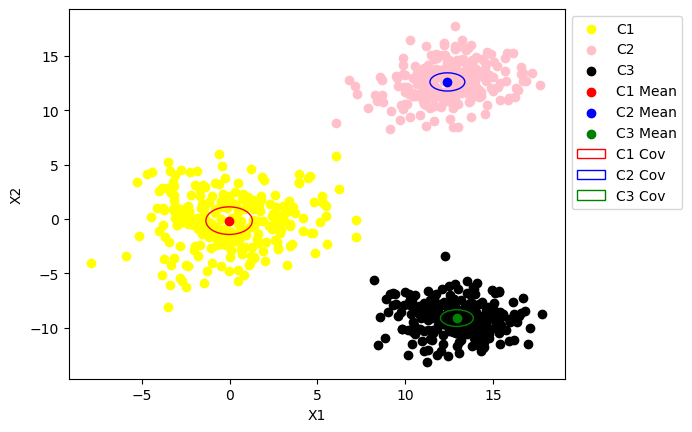

C:\Users\bryso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


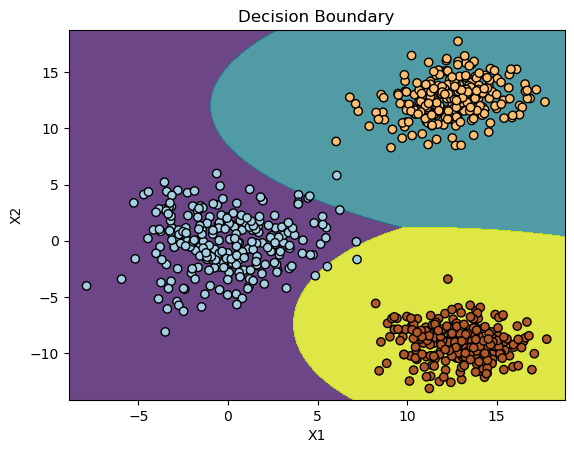

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       150

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



<Figure size 640x480 with 0 Axes>

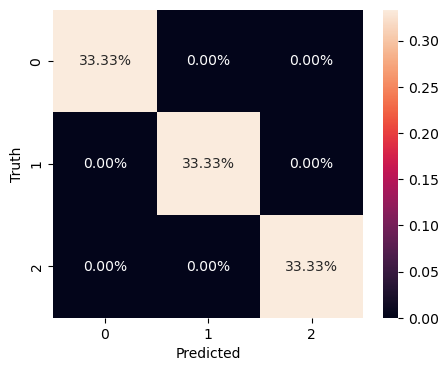

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.metrics import confusion_matrix, classification_report

# Read and label training data
c1_train = pd.read_csv('linearSep/class1_train.txt', sep=' ', names=['X1', 'X2'])
c1_train['Class'] = 0
c2_train = pd.read_csv('linearSep/class2_train.txt', sep=' ', names=['X1', 'X2'])
c2_train['Class'] = 1
c3_train = pd.read_csv('linearSep/class3_train.txt', sep=' ', names=['X1', 'X2'])
c3_train['Class'] = 2

# Calculate mean vectors and covariance matrices
c1_mean, c1_cov = c1_train[['X1', 'X2']].mean().values, c1_train[['X1', 'X2']].cov().values
c2_mean, c2_cov = c2_train[['X1', 'X2']].mean().values, c2_train[['X1', 'X2']].cov().values
c3_mean, c3_cov = c3_train[['X1', 'X2']].mean().values, c3_train[['X1', 'X2']].cov().values

# Set the non diagonal elements to 0
rows, cols = c3_cov.shape

# Iterate through the matrix
for i in range(rows):
    for j in range(cols):
        if i != j:  # Check if the element is not on the diagonal
            c1_cov[i, j] = 0  
            c2_cov[i, j] = 0  
            c3_cov[i, j] = 0  

# Create a scatter plot for the mean vectors
plt.scatter(c1_train['X1'], c1_train['X2'], c='yellow', marker='o', label='C1')
plt.scatter(c2_train['X1'], c2_train['X2'], c='pink', marker='o', label='C2')
plt.scatter(c3_train['X1'], c3_train['X2'], c='black', marker='o', label='C3')

plt.scatter(c1_mean[0], c1_mean[1], c='red', marker='o', label='C1 Mean')
plt.scatter(c2_mean[0], c2_mean[1], c='blue', marker='o', label='C2 Mean')
plt.scatter(c3_mean[0], c3_mean[1], c='green', marker='o', label='C3 Mean')

# Create ellipses for covariance matrices
ellipse_c1 = Ellipse(xy=c1_mean, width=np.sqrt(c1_cov[0, 0]), height=np.sqrt(c1_cov[1, 1]), edgecolor='red', facecolor='none', label='C1 Cov')
ellipse_c2 = Ellipse(xy=c2_mean, width=np.sqrt(c2_cov[0, 0]), height=np.sqrt(c2_cov[1, 1]), edgecolor='blue', facecolor='none', label='C2 Cov')
ellipse_c3 = Ellipse(xy=c3_mean, width=np.sqrt(c3_cov[0, 0]), height=np.sqrt(c3_cov[1, 1]), edgecolor='green', facecolor='none', label='C3 Cov')

# Plot the ellipses
plt.gca().add_patch(ellipse_c1)
plt.gca().add_patch(ellipse_c2)
plt.gca().add_patch(ellipse_c3)

# Set plot labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()
plt.savefig('BC_c_LinearlySep.png')


# Read and label validation and test data
c1_val = pd.read_csv('linearSep/class1_val.txt', sep=' ', names=['X1', 'X2'])
c1_val['Class'] = 0
c2_val = pd.read_csv('linearSep/class2_val.txt', sep=' ', names=['X1', 'X2'])
c2_val['Class'] = 1
c3_val = pd.read_csv('linearSep/class3_val.txt', sep=' ', names=['X1', 'X2'])
c3_val['Class'] = 2

c1_test = pd.read_csv('linearSep/class1_test.txt', sep=' ', names=['X1', 'X2'])
c1_test['Class'] = 0
c2_test = pd.read_csv('linearSep/class2_test.txt', sep=' ', names=['X1', 'X2'])
c2_test['Class'] = 1
c3_test = pd.read_csv('linearSep/class3_test.txt', sep=' ', names=['X1', 'X2'])
c3_test['Class'] = 2

# Concatenate data
train_data = pd.concat([c1_train, c2_train, c3_train], axis=0)
val_data = pd.concat([c1_val, c2_val, c3_val], axis=0)
test_data = pd.concat([c1_test, c2_test, c3_test], axis=0)

# Separate data and labels
X_train, y_train = train_data[['X1', 'X2']], train_data['Class']
X_val, y_val = val_data[['X1', 'X2']], val_data['Class']
X_test, y_test = test_data[['X1', 'X2']], test_data['Class']

# Create and train the custom Gaussian Naive Bayes classifier
custom_gnb = CustomMultivariateGaussianNB(class_means=[c1_mean, c2_mean, c3_mean],
                                          class_covs=[c1_cov, c2_cov, c3_cov])

# Fit the custom classifier
custom_gnb.fit(X_train.values, y_train.values)

# Define a mesh grid for visualization
x_min, x_max = X_train['X1'].min() - 1, X_train['X1'].max() + 1
y_min, y_max = X_train['X2'].min() - 1, X_train['X2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class labels for each point on the mesh grid
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot of the training data points
plt.scatter(X_train['X1'], X_train['X2'], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

# Set labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')

# Show the plot
plt.show()
plt.savefig('BC_c_LinearlySepTest.png')


# Predict class labels for validation and test data
val_results = custom_gnb.predict(X_val)
test_results = custom_gnb.predict(X_test)

# Calculate and plot the confusion matrix for the test data
conf_matrix = confusion_matrix(y_val, val_results)
import seaborn as sn

plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix / np.sum(conf_matrix), annot=True, fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print classification report, including F1-score and recall
print("Classification Report:\n", classification_report(y_val, val_results))

# Show the plot
plt.show()
plt.savefig('BC_c_LinearlySepConf.png')



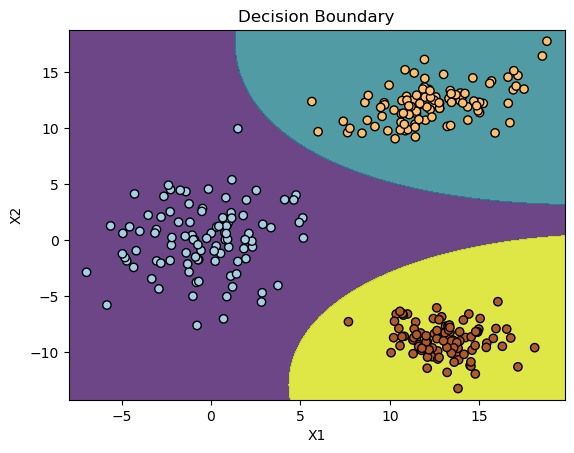

<Figure size 640x480 with 0 Axes>

In [9]:
# Define a mesh grid for visualization
x_min, x_max = X_test['X1'].min() - 1, X_test['X1'].max() + 1
y_min, y_max = X_test['X2'].min() - 1, X_test['X2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class labels for each point on the mesh grid
Z = custom_gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot of the training data points
plt.scatter(X_test['X1'], X_test['X2'], c=y_test, edgecolors='k', cmap=plt.cm.Paired)

# Set labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')

# Show the plot
plt.show()
plt.savefig('BC_c_LinearlySepTest.png')

#

**non Linearly seperable data**

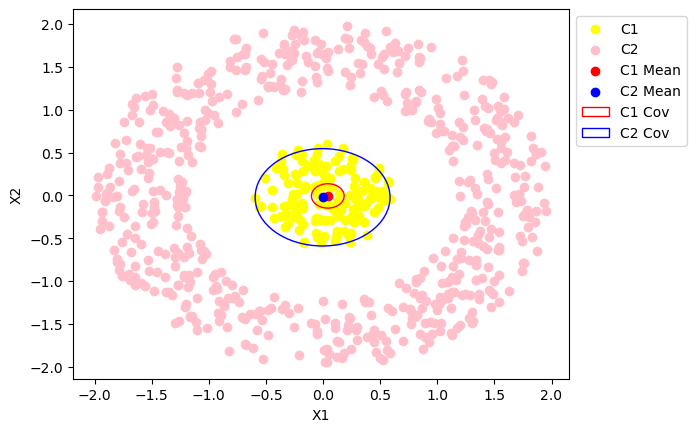

C:\Users\bryso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


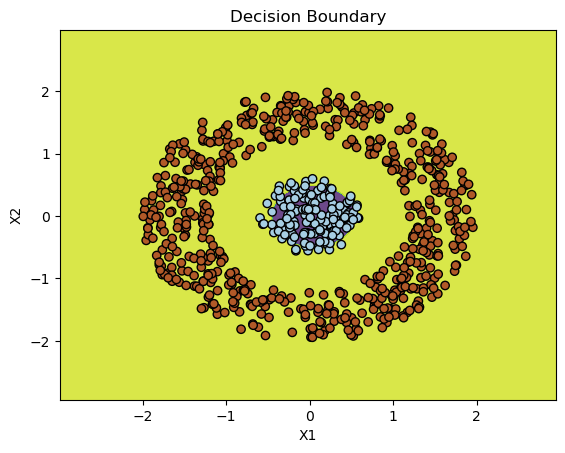

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85        90
           1       0.94      1.00      0.97       360

    accuracy                           0.95       450
   macro avg       0.97      0.87      0.91       450
weighted avg       0.95      0.95      0.95       450



<Figure size 640x480 with 0 Axes>

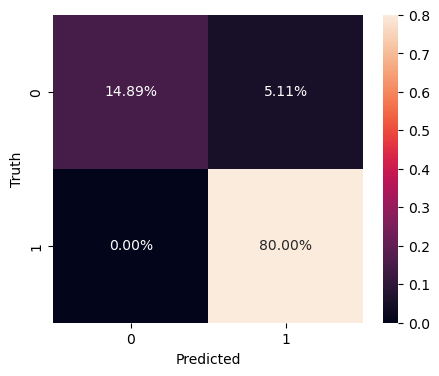

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.metrics import confusion_matrix, classification_report

# Read and label training data
c1_train = pd.read_csv('nonlinearSep/class1_train.txt', sep=' ', names=['X1', 'X2'])
c1_train['Class'] = 0
c2_train = pd.read_csv('nonlinearSep/class2_train.txt', sep=' ', names=['X1', 'X2'])
c2_train['Class'] = 1


# Calculate mean vectors and covariance matrices
c1_mean, c1_cov = c1_train[['X1', 'X2']].mean().values, c1_train[['X1', 'X2']].cov().values
c2_mean, c2_cov = c2_train[['X1', 'X2']].mean().values, c2_train[['X1', 'X2']].cov().values

# Set the non diagonal elements to 0
rows, cols = c3_cov.shape

# Iterate through the matrix
for i in range(rows):
    for j in range(cols):
        if i != j:  # Check if the element is not on the diagonal
            c1_cov[i, j] = 0  
            c2_cov[i, j] = 0  

# Create a scatter plot for the mean vectors
plt.scatter(c1_train['X1'], c1_train['X2'], c='yellow', marker='o', label='C1')
plt.scatter(c2_train['X1'], c2_train['X2'], c='pink', marker='o', label='C2')

plt.scatter(c1_mean[0], c1_mean[1], c='red', marker='o', label='C1 Mean')
plt.scatter(c2_mean[0], c2_mean[1], c='blue', marker='o', label='C2 Mean')

# Create ellipses for covariance matrices
ellipse_c1 = Ellipse(xy=c1_mean, width=np.sqrt(c1_cov[0, 0]), height=np.sqrt(c1_cov[1, 1]), edgecolor='red', facecolor='none', label='C1 Cov')
ellipse_c2 = Ellipse(xy=c2_mean, width=np.sqrt(c2_cov[0, 0]), height=np.sqrt(c2_cov[1, 1]), edgecolor='blue', facecolor='none', label='C2 Cov')

# Plot the ellipses
plt.gca().add_patch(ellipse_c1)
plt.gca().add_patch(ellipse_c2)

# Set plot labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()
plt.savefig('BC_c_nonLinearlySep.png')


# Read and label validation and test data
c1_val = pd.read_csv('nonlinearSep/class1_val.txt', sep=' ', names=['X1', 'X2'])
c1_val['Class'] = 0
c2_val = pd.read_csv('nonlinearSep/class2_val.txt', sep=' ', names=['X1', 'X2'])
c2_val['Class'] = 1

c1_test = pd.read_csv('nonlinearSep/class1_test.txt', sep=' ', names=['X1', 'X2'])
c1_test['Class'] = 0
c2_test = pd.read_csv('nonlinearSep/class2_test.txt', sep=' ', names=['X1', 'X2'])
c2_test['Class'] = 1

# Concatenate data
train_data = pd.concat([c1_train, c2_train], axis=0)
val_data = pd.concat([c1_val, c2_val], axis=0)
test_data = pd.concat([c1_test, c2_test], axis=0)

# Separate data and labels
X_train, y_train = train_data[['X1', 'X2']], train_data['Class']
X_val, y_val = val_data[['X1', 'X2']], val_data['Class']
X_test, y_test = test_data[['X1', 'X2']], test_data['Class']

custom_gnb = CustomMultivariateGaussianNB(class_means=[c1_mean, c2_mean, c3_mean],
                                          class_covs=[c1_cov, c2_cov])# Fit the custom classifier
custom_gnb.fit(X_train.values, y_train.values)

# Define a mesh grid for visualization
x_min, x_max = X_train['X1'].min() - 1, X_train['X1'].max() + 1
y_min, y_max = X_train['X2'].min() - 1, X_train['X2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class labels for each point on the mesh grid
Z = custom_gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot of the training data points
plt.scatter(X_train['X1'], X_train['X2'], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

# Set labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')

# Show the plot
plt.show()
plt.savefig('BC_c_nonLinearlySepTest.png')


# Predict class labels for validation and test data
val_results = custom_gnb.predict(X_val)
test_results = custom_gnb.predict(X_test)

# Calculate and plot the confusion matrix for the test data
conf_matrix = confusion_matrix(y_val, val_results)
import seaborn as sn

plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix / np.sum(conf_matrix), annot=True, fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print classification report, including F1-score and recall
print("Classification Report:\n", classification_report(y_val, val_results))

# Show the plot
plt.show()
plt.savefig('BC_c_nonLinearlySepConf.png')



C:\Users\bryso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


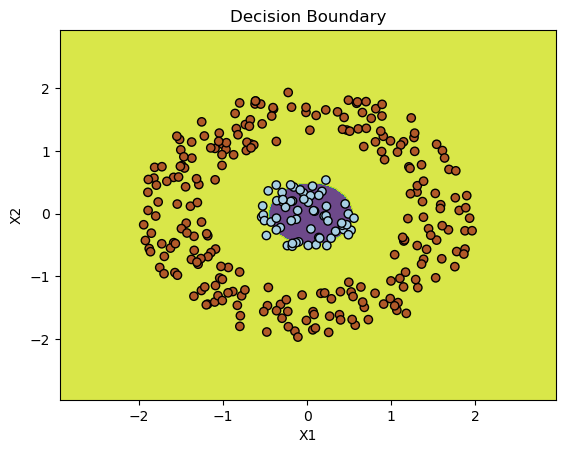

<Figure size 640x480 with 0 Axes>

In [4]:
# Define a mesh grid for visualization
x_min, x_max = X_test['X1'].min() - 1, X_test['X1'].max() + 1
y_min, y_max = X_test['X2'].min() - 1, X_test['X2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class labels for each point on the mesh grid
Z = custom_gnbgnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot of the training data points
plt.scatter(X_test['X1'], X_test['X2'], c=y_test, edgecolors='k', cmap=plt.cm.Paired)

# Set labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')

# Show the plot
plt.show()
plt.savefig('BC_c_nonLinearlySepTest.png')

#

**Overlapping data**

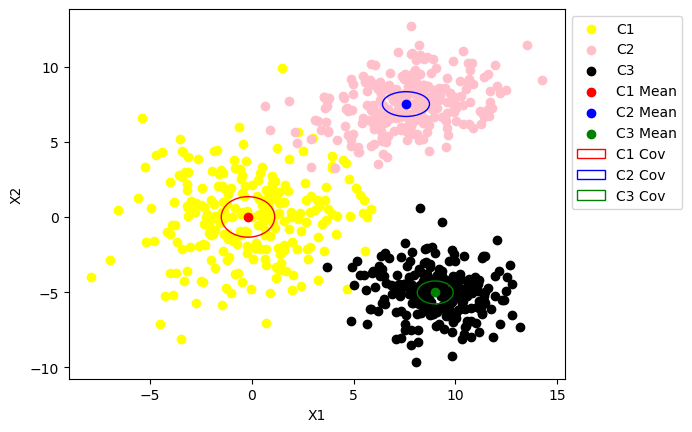

C:\Users\bryso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


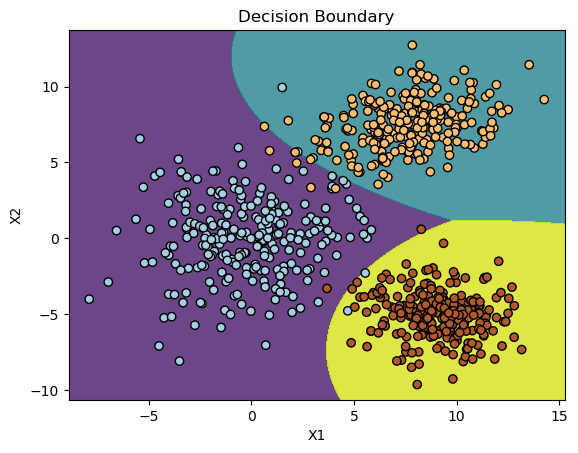

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       150
           1       0.98      0.99      0.98       150
           2       0.99      0.99      0.99       150

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



<Figure size 640x480 with 0 Axes>

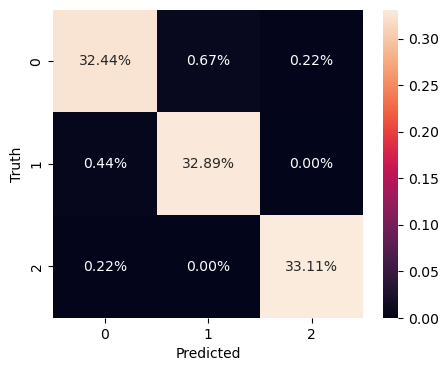

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.metrics import confusion_matrix, classification_report

# Read and label training data
c1_train = pd.read_csv('overlapping/class1_train.txt', sep=' ', names=['X1', 'X2'])
c1_train['Class'] = 0
c2_train = pd.read_csv('overlapping/class2_train.txt', sep=' ', names=['X1', 'X2'])
c2_train['Class'] = 1
c3_train = pd.read_csv('overlapping/class3_train.txt', sep=' ', names=['X1', 'X2'])
c3_train['Class'] = 2

# Calculate mean vectors and covariance matrices
c1_mean, c1_cov = c1_train[['X1', 'X2']].mean().values, c1_train[['X1', 'X2']].cov().values
c2_mean, c2_cov = c2_train[['X1', 'X2']].mean().values, c2_train[['X1', 'X2']].cov().values
c3_mean, c3_cov = c3_train[['X1', 'X2']].mean().values, c3_train[['X1', 'X2']].cov().values

# Set the non diagonal elements to 0
rows, cols = c3_cov.shape

# Iterate through the matrix
for i in range(rows):
    for j in range(cols):
        if i != j:  # Check if the element is not on the diagonal
            c1_cov[i, j] = 0  
            c2_cov[i, j] = 0  
            c3_cov[i, j] = 0  

# Create a scatter plot for the mean vectors
plt.scatter(c1_train['X1'], c1_train['X2'], c='yellow', marker='o', label='C1')
plt.scatter(c2_train['X1'], c2_train['X2'], c='pink', marker='o', label='C2')
plt.scatter(c3_train['X1'], c3_train['X2'], c='black', marker='o', label='C3')

plt.scatter(c1_mean[0], c1_mean[1], c='red', marker='o', label='C1 Mean')
plt.scatter(c2_mean[0], c2_mean[1], c='blue', marker='o', label='C2 Mean')
plt.scatter(c3_mean[0], c3_mean[1], c='green', marker='o', label='C3 Mean')

# Create ellipses for covariance matrices
ellipse_c1 = Ellipse(xy=c1_mean, width=np.sqrt(c1_cov[0, 0]), height=np.sqrt(c1_cov[1, 1]), edgecolor='red', facecolor='none', label='C1 Cov')
ellipse_c2 = Ellipse(xy=c2_mean, width=np.sqrt(c2_cov[0, 0]), height=np.sqrt(c2_cov[1, 1]), edgecolor='blue', facecolor='none', label='C2 Cov')
ellipse_c3 = Ellipse(xy=c3_mean, width=np.sqrt(c3_cov[0, 0]), height=np.sqrt(c3_cov[1, 1]), edgecolor='green', facecolor='none', label='C3 Cov')

# Plot the ellipses
plt.gca().add_patch(ellipse_c1)
plt.gca().add_patch(ellipse_c2)
plt.gca().add_patch(ellipse_c3)

# Set plot labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()
plt.savefig('BC_c_OverlappingSep.png')


# Read and label validation and test data
c1_val = pd.read_csv('overlapping/class1_val.txt', sep=' ', names=['X1', 'X2'])
c1_val['Class'] = 0
c2_val = pd.read_csv('overlapping/class2_val.txt', sep=' ', names=['X1', 'X2'])
c2_val['Class'] = 1
c3_val = pd.read_csv('overlapping/class3_val.txt', sep=' ', names=['X1', 'X2'])
c3_val['Class'] = 2

c1_test = pd.read_csv('overlapping/class1_test.txt', sep=' ', names=['X1', 'X2'])
c1_test['Class'] = 0
c2_test = pd.read_csv('overlapping/class2_test.txt', sep=' ', names=['X1', 'X2'])
c2_test['Class'] = 1
c3_test = pd.read_csv('overlapping/class3_test.txt', sep=' ', names=['X1', 'X2'])
c3_test['Class'] = 2

# Concatenate data
train_data = pd.concat([c1_train, c2_train, c3_train], axis=0)
val_data = pd.concat([c1_val, c2_val, c3_val], axis=0)
test_data = pd.concat([c1_test, c2_test, c3_test], axis=0)

# Separate data and labels
X_train, y_train = train_data[['X1', 'X2']], train_data['Class']
X_val, y_val = val_data[['X1', 'X2']], val_data['Class']
X_test, y_test = test_data[['X1', 'X2']], test_data['Class']

# Create and train the custom Gaussian Naive Bayes classifier
custom_gnb = CustomMultivariateGaussianNB(class_means=[c1_mean, c2_mean, c3_mean],
                                          class_covs=[c1_cov, c2_cov, c3_cov])
# Fit the custom classifier
custom_gnb.fit(X_train.values, y_train.values)

# Define a mesh grid for visualization
x_min, x_max = X_train['X1'].min() - 1, X_train['X1'].max() + 1
y_min, y_max = X_train['X2'].min() - 1, X_train['X2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class labels for each point on the mesh grid
Z = custom_gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot of the training data points
plt.scatter(X_train['X1'], X_train['X2'], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

# Set labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')

# Show the plot
plt.show()
plt.savefig('BC_c_OverlappingTest.png')


# Predict class labels for validation and test data
val_results = gnb.predict(X_val)
test_results = gnb.predict(X_test)

# Calculate and plot the confusion matrix for the test data
conf_matrix = confusion_matrix(y_val, val_results)
import seaborn as sn

plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix / np.sum(conf_matrix), annot=True, fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print classification report, including F1-score and recall
print("Classification Report:\n", classification_report(y_val, val_results))

# Show the plot
plt.show()
plt.savefig('BC_c_OverlappingConf.png')



C:\Users\bryso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


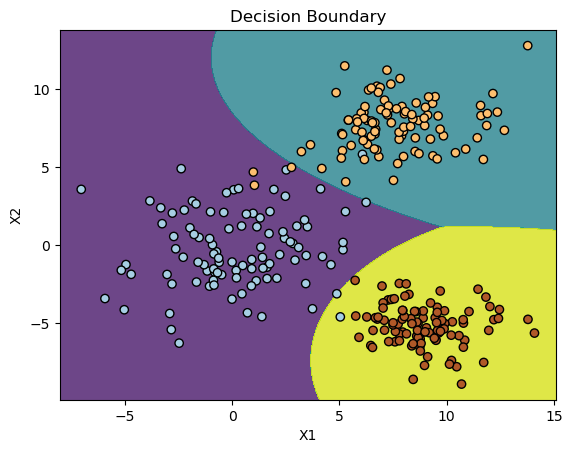

<Figure size 640x480 with 0 Axes>

In [6]:
# Define a mesh grid for visualization
x_min, x_max = X_test['X1'].min() - 1, X_test['X1'].max() + 1
y_min, y_max = X_test['X2'].min() - 1, X_test['X2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class labels for each point on the mesh grid
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot of the training data points
plt.scatter(X_test['X1'], X_test['X2'], c=y_test, edgecolors='k', cmap=plt.cm.Paired)

# Set labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')

# Show the plot
plt.show()
plt.savefig('BC_c_OverlappingTest.png')

#

#